# Clustering

In [1]:
working_dir = "../data/"
%cd $working_dir

/home/ander/Projects/adatos-ta/data


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pyreadstat

In [3]:
df = pd.read_csv("datos_post_step4a_scaled_no_dummies.csv")
df.head(5)

,tipo_persona,tipo_contribuyente,categoria_vehiculo,marca_agrupada,distrito_fiscal_agrupado,porcentaje_propiedad_cat,valor_adquisicion_scaled,valor_referencial_scaled,anios_desde_inscripcion_scaled
0,natural,pequeno,b1234_pickup_otros,FORD,OTROS,propietario_total,0.791119,0.817195,0.5
1,natural,pequeno,b1234_pickup_otros,CHEVROLET,OTROS,propietario_total,-0.618776,-0.541252,-0.5
2,natural,pequeno,b1234_pickup_otros,OTROS,OTROS,propietario_total,0.867780,0.928145,0.0
3,soc_conyugal,pequeno,a2_1051_1500cc,HYUNDAI,OTROS,propietario_total,-0.481942,-0.800322,0.5
4,natural,pequeno,b1234_pickup_otros,JETOUR,OTROS,propietario_total,-0.478479,-0.154281,0.0


In [4]:
df.dtypes

tipo_persona                       object
tipo_contribuyente                 object
categoria_vehiculo                 object
marca_agrupada                     object
distrito_fiscal_agrupado           object
porcentaje_propiedad_cat           object
valor_adquisicion_scaled          float64
valor_referencial_scaled          float64
anios_desde_inscripcion_scaled    float64
dtype: object

In [ ]:
descriptivesMax = df.describe()
RIC = descriptivesMax.loc['75%'] - descriptivesMax.loc['25%']

In [5]:
limite_superior_adquisicion = descriptivesMax['valor_adquisicion_pen'].loc['75%'] + (1.5 * RIC['valor_adquisicion_pen'])
df['es_valor_adquisicion_alto'] = (df['valor_adquisicion_pen'] > limite_superior_adquisicion).astype(int)

print(f"Registros con valor_adquisicion_pen alto (outliers): {df['es_valor_adquisicion_alto'].sum()}")
print(df['es_valor_adquisicion_alto'].value_counts())

limite_superior_referencial = descriptivesMax['valor_referencial_2025_pen'].loc['75%'] + (1.5 * RIC['valor_referencial_2025_pen'])
df['es_valor_referencial_alto'] = (df['valor_referencial_2025_pen'] > limite_superior_referencial).astype(int)

print(f"Registros con valor_referencial_2025_pen alto (outliers): {df['es_valor_referencial_alto'].sum()}")
print(df['es_valor_referencial_alto'].value_counts())

NameError: name 'descriptivesMax' is not defined

In [5]:
df['es_valor_adquisicion_alto'] = df['es_valor_adquisicion_alto'].astype('category')
df['es_valor_referencial_alto'] = df['es_valor_referencial_alto'].astype('category')

print(df[['es_valor_adquisicion_alto', 'es_valor_referencial_alto']].dtypes)

es_valor_adquisicion_alto    category
es_valor_referencial_alto    category
dtype: object


In [6]:
df.describe()

,valor_adquisicion_scaled,valor_referencial_scaled,anios_desde_inscripcion_scaled
count,247816.000000,247816.000000,247816.000000
mean,0.081456,0.157913,-0.004370
std,1.247004,0.825452,0.400584
min,-15.267415,-4.533988,-0.500000
25%,-0.441097,-0.435798,-0.500000
50%,0.000000,0.000000,0.000000
75%,0.558903,0.564202,0.500000
max,6.175663,4.301016,0.500000


In [ ]:
df["porcentaje_propiedad"].value_counts()

In [ ]:
import numpy as np

df['porcentaje_propiedad_cat'] = np.where(df['porcentaje_propiedad'] == 100, 'propietario_total', 'copropietario')
print(df['porcentaje_propiedad_cat'].value_counts())
df.drop(columns=['porcentaje_propiedad'], inplace=True)

In [7]:
from kmodes.kprototypes import KPrototypes

modelo1 = KPrototypes(random_state=2025, init='random', n_jobs=-1) 

In [8]:
categorical_columns_pos = [df.columns.get_loc(col) for col in list(df.select_dtypes(include=['object', 'category']).columns)]
categorical_columns_pos

[0, 1, 2, 3, 4, 5, 6, 7, 8]

### Sample 25k registros

In [9]:
df_sample = df.sample(25000, random_state=2025)
df_sample_matrix = df_sample.to_numpy()
df_sample_matrix

array([['natural', 'pequeno', 'camioneta', ..., -0.4814943369981709,
        -0.3345118703114144, -0.5],
       ['natural', 'pequeno', 'camioneta', ..., -0.5078667437137044,
        -0.8801579875715138, 0.0],
       ['juridica', 'grande', 'camioneta', ..., -0.3595283830021332,
        -0.1777728967338738, 0.0],
       ...,
       ['soc_conyugal', 'pequeno', 'camioneta', ..., -0.4183017379149858,
        -0.5430129283222679, 0.5],
       ['natural', 'mediano', 'automovil', ..., -0.9121244227644992,
        -0.6424244898580154, 0.5],
       ['juridica', 'mediano', 'camioneta', ..., -0.1406634683011556,
        0.3056658028271079, 0.5]], shape=(25000, 12), dtype=object)

In [10]:
cost = []
for cluster in range(1, 11):
    try:
        kprototype = KPrototypes(n_clusters=cluster, max_iter=30, n_init=5, random_state=2025, init='random', n_jobs=-1)
        kprototype.fit_predict(df_sample_matrix, categorical=categorical_columns_pos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except Exception as e:
        print(f"Error en cluster {cluster}: {e}")
        break

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9
Cluster initiation: 10


In [11]:
df_cost = pd.DataFrame({'Cluster':range(1, 11), 'Cost':cost})
df_cost

,Cluster,Cost
0,1,89704.479269
1,2,68096.972040
2,3,58394.624195
3,4,45402.812651
4,5,41469.716739
5,6,38806.294616
6,7,37364.069523
7,8,34896.182541
8,9,33411.429539
9,10,32439.705629


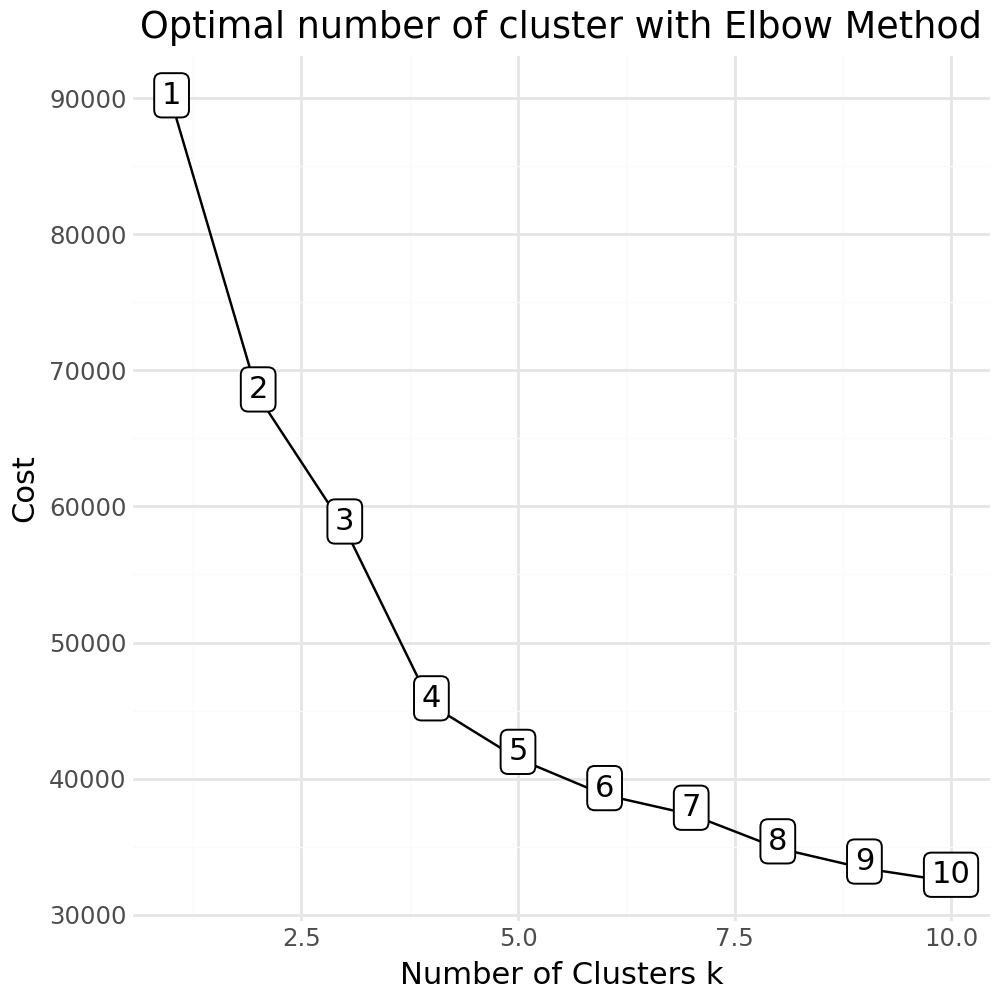

In [12]:
from plotnine import *
import plotnine

plotnine.options.figure_size = (5, 5)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 11,
               nudge_y = 500) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    #xlim(0, 11.5) +
    #ylim(230, 500) +
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

### Sample 50k registros

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9
Cluster initiation: 10


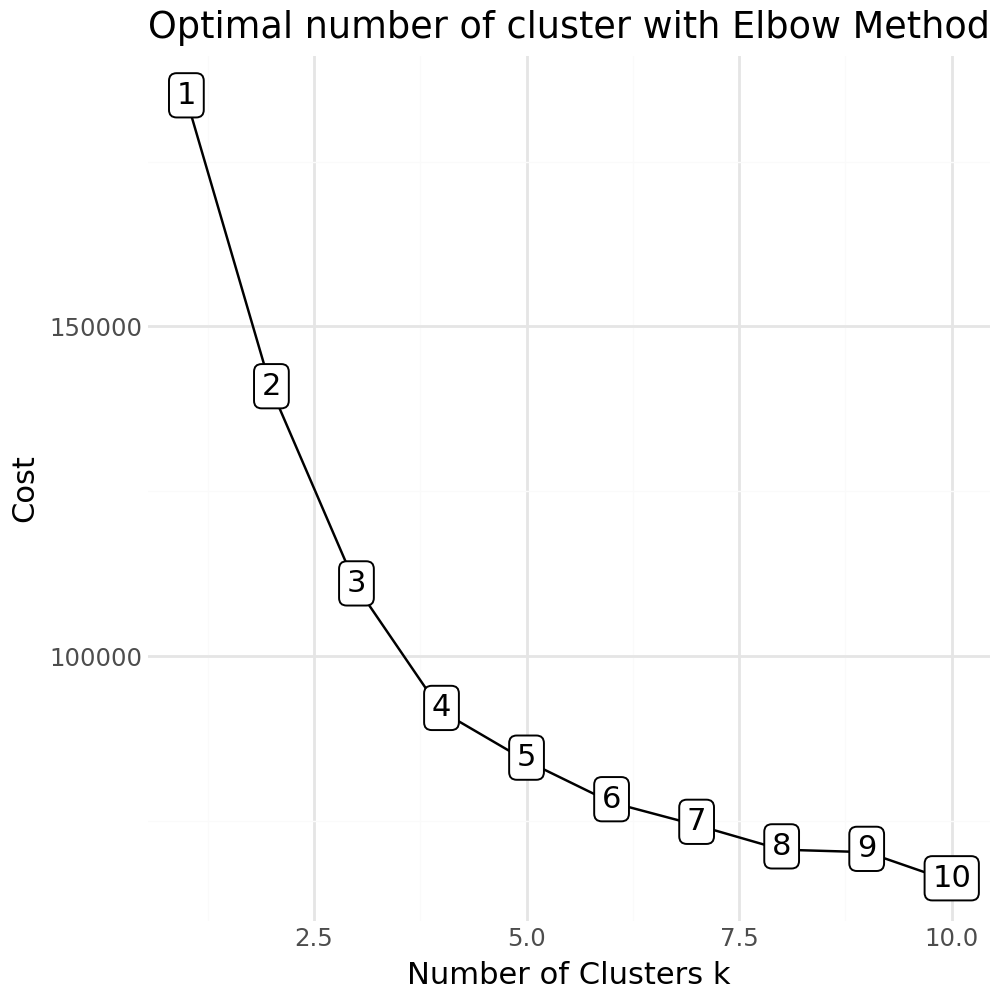

In [13]:
df_sample2 = df.sample(50000, random_state=2025)
df_sample2_matrix = df_sample2.to_numpy()

cost2 = []
for cluster in range(1, 11):
    try:
        kprototype = KPrototypes(n_clusters=cluster, max_iter=30, n_init=5, random_state=2025, init='random', n_jobs=-1)
        kprototype.fit_predict(df_sample2_matrix, categorical=categorical_columns_pos)
        cost2.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except Exception as e:
        print(f"Error en cluster {cluster}: {e}")
        break

df_cost2 = pd.DataFrame({'Cluster':range(1, 11), 'Cost':cost2})

plotnine.options.figure_size = (5, 5)
(
    ggplot(data = df_cost2)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 11,
               nudge_y = 500) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    #xlim(0, 11.5) +
    #ylim(230, 500) +
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

### Sin clase vehiculo

In [14]:
df2 = df.drop(columns=['clase_vehiculo'])

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9
Cluster initiation: 10


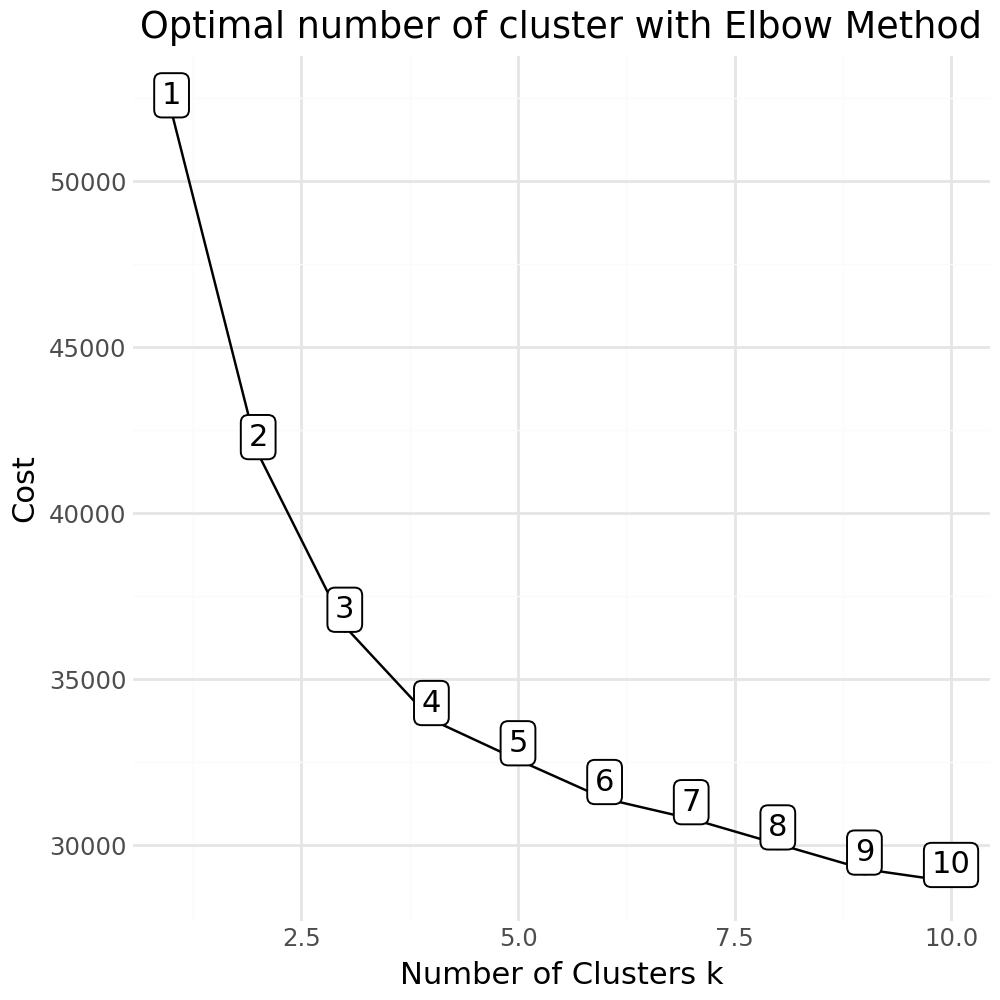

In [15]:
df2_sample = df2.sample(25000, random_state=2025)
df2_sample_matrix = df2_sample.to_numpy()

cost2 = []
for cluster in range(1, 11):
    try:
        kprototype = KPrototypes(n_clusters=cluster, max_iter=30, n_init=5, random_state=2025, init='random', n_jobs=-1)
        kprototype.fit_predict(df2_sample_matrix, categorical=categorical_columns_pos)
        cost2.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except Exception as e:
        print(f"Error en cluster {cluster}: {e}")
        break

df_cost2 = pd.DataFrame({'Cluster':range(1, 11), 'Cost':cost2})

plotnine.options.figure_size = (5, 5)
(
    ggplot(data = df_cost2)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 11,
               nudge_y = 500) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    #xlim(0, 11.5) +
    #ylim(230, 500) +
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9
Cluster initiation: 10


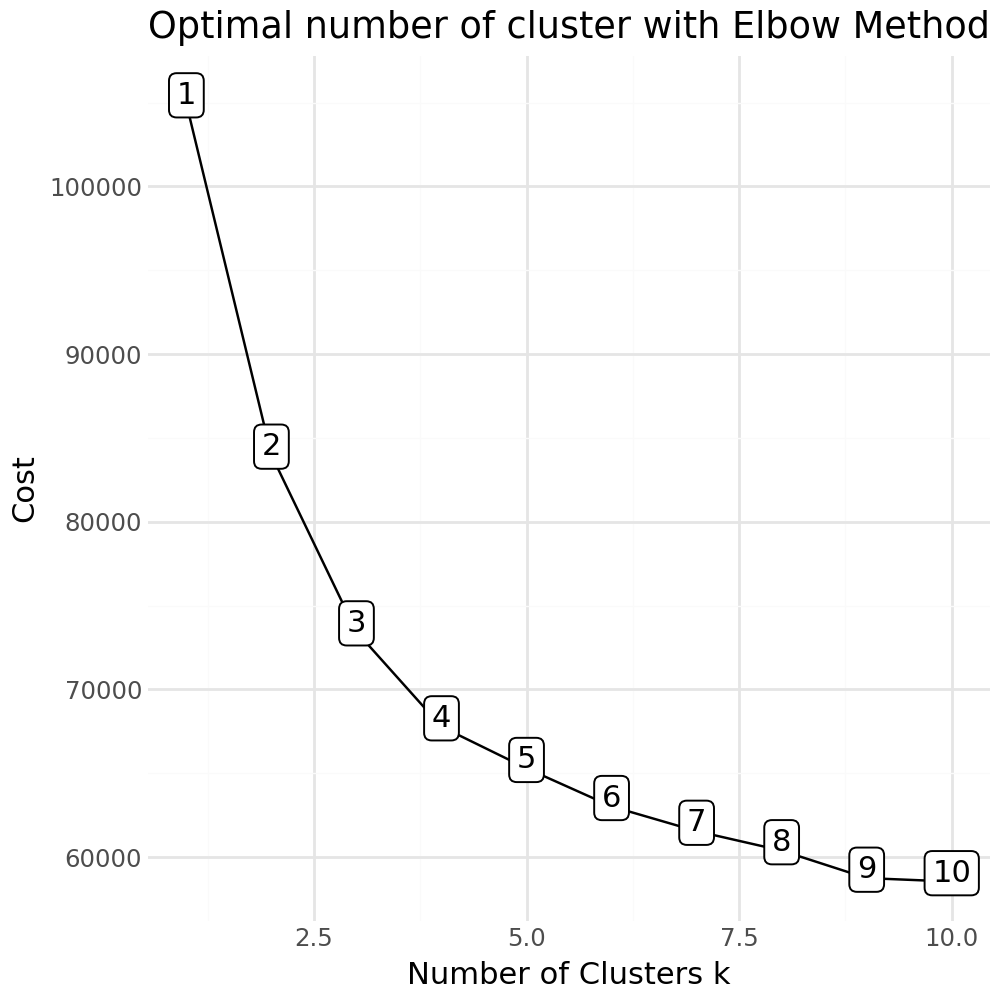

In [16]:
df2_sample = df2.sample(50000, random_state=2025)
df2_sample_matrix = df2_sample.to_numpy()

cost2 = []
for cluster in range(1, 11):
    try:
        kprototype = KPrototypes(n_clusters=cluster, max_iter=30, n_init=5, random_state=2025, init='random', n_jobs=-1)
        kprototype.fit_predict(df2_sample_matrix, categorical=categorical_columns_pos)
        cost2.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except Exception as e:
        print(f"Error en cluster {cluster}: {e}")
        break

df_cost2 = pd.DataFrame({'Cluster':range(1, 11), 'Cost':cost2})

plotnine.options.figure_size = (5, 5)
(
    ggplot(data = df_cost2)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 11,
               nudge_y = 500) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    #xlim(0, 11.5) +
    #ylim(230, 500) +
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

### Entrenamiento con k=4

In [17]:
df_matrix = df.to_numpy()
df_matrix

array([['natural', 'pequeno', 'camioneta', ..., 0.791119084647367,
        0.8171953394981525, 0.5],
       ['natural', 'pequeno', 'camioneta', ..., -0.6187764070113738,
        -0.541251673114983, -0.5],
       ['natural', 'pequeno', 'camioneta', ..., 0.8677799516218909,
        0.928144876129272, 0.0],
       ...,
       ['natural', 'pequeno', 'camioneta', ..., 0.8784103931473141,
        0.6118877815437304, 0.5],
       ['natural', 'pequeno', 'camioneta', ..., 0.2117487714700135,
        0.1895359584983423, 0.5],
       ['soc_conyugal', 'pequeno', 'camioneta', ..., 0.3218983464372955,
        0.5388539385037261, 0.0]], shape=(247816, 12), dtype=object)

In [18]:
modelo1 = KPrototypes(n_clusters = 4, max_iter= 25, n_init= 5, random_state = 2025, init = 'Huang', n_jobs = -1, verbose=1)
modelo1.fit_predict(df_matrix, categorical = categorical_columns_pos)

Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Starting iterations...
Starting iterations...
Starting iterations...
Starting iterations...
Starting iterations...
Run: 2, iteration: 1/25, moves: 33680, ncost: 600748.9498683217
Run: 3, iteration: 1/25, moves: 54703, ncost: 497923.09068373614
Run: 4, iteration: 1/25, moves: 57124, ncost: 517347.45532752055
Run: 5, iteration: 1/25, moves: 69797, ncost: 619722.88997368
Run: 1, iteration: 1/25, moves: 100265, ncost: 620413.1235509275
Run: 3, iteration: 2/25, moves: 6305, ncost: 467787.0957802797
Run: 4, iteration: 2/25, moves: 14496, ncost: 469829.10958500754
Run: 2, iteration: 2/25, moves: 37378, ncost: 591916.4620039966
Run: 5, iteration: 2/25, moves: 43594, ncost: 541488.2185745601
Run: 1, iteration: 2/25

array([0, 3, 0, ..., 0, 0, 0], shape=(247816,), dtype=uint16)

In [19]:
print(modelo1.cluster_centroids_)

[['0.5124627125557235' '0.5049385343870604' '-0.02627774126687225'
  'juridica' 'pequeno' 'camioneta' 'b1234_pickup_otros' 'TOYOTA'
  'SAN ISIDRO' '0' '0' 'propietario_total']
 ['2.2344900292339833' '2.1958253295545362' '-0.02824371636097612'
  'natural' 'pequeno' 'camion' 'c1_camiones' 'OTROS' 'SAN ISIDRO' '1' '1'
  'propietario_total']
 ['-12.77855070274283' '0.06919945102463385' '0.24929971988795518'
  'natural' 'pequeno' 'camioneta' 'b1234_pickup_otros' 'TOYOTA'
  'SAN ISIDRO' '0' '0' 'propietario_total']
 ['-0.46288479087585443' '-0.4110481925093961' '0.013904104799421925'
  'natural' 'pequeno' 'camioneta' 'b1234_pickup_otros' 'TOYOTA'
  'SANTIAGO DE SURCO' '0' '0' 'propietario_total']]


In [20]:
modelo1.n_iter_

12

In [21]:
print(modelo1.cost_)

458066.5059822926


In [22]:
df['Cluster_modelo1'] = modelo1.labels_
df.head(5)

,tipo_persona,tipo_contribuyente,clase_vehiculo,categoria_vehiculo,marca_agrupada,distrito_fiscal_agrupado,es_valor_adquisicion_alto,es_valor_referencial_alto,porcentaje_propiedad_cat,valor_adquisicion_scaled,valor_referencial_scaled,anios_desde_inscripcion_scaled,Cluster_modelo1
0,natural,pequeno,camioneta,b1234_pickup_otros,FORD,OTROS,0,0,propietario_total,0.791119,0.817195,0.5,0
1,natural,pequeno,camioneta,b1234_pickup_otros,CHEVROLET,OTROS,0,0,propietario_total,-0.618776,-0.541252,-0.5,3
2,natural,pequeno,camioneta,b1234_pickup_otros,OTROS,OTROS,0,0,propietario_total,0.867780,0.928145,0.0,0
3,soc_conyugal,pequeno,automovil,a2_1051_1500cc,HYUNDAI,OTROS,0,0,propietario_total,-0.481942,-0.800322,0.5,3
4,natural,pequeno,camioneta,b1234_pickup_otros,JETOUR,OTROS,0,0,propietario_total,-0.478479,-0.154281,0.0,3


In [23]:
df['Cluster_modelo1'].value_counts()

Cluster_modelo1
3    128703
0     98905
1     19137
2      1071
Name: count, dtype: int64

In [29]:
import plotly.express as px

fig = px.scatter_3d(df, x='valor_adquisicion_scaled', y='valor_referencial_scaled', z='anios_desde_inscripcion_scaled', color='Cluster_modelo1')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed